In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import processing
from tqdm import tqdm

In [2]:
df = pd.read_excel('lipid_subtype.xlsx')
df = df.dropna(axis=1,how='all')
x = df.iloc[:,::2]
y = df.iloc[:,1::2]
col_stats = {}

curr_min = np.inf
for col in x:
    if x[col].max() < 3100:
        continue
    count = x[col].count()
    if count < curr_min:
        row = count
    col_stats['Min'] = [row, col]

new_wavenumbers = np.linspace(2700, 3100, 61)
new_dataset = {}
new_dataset[''] = new_wavenumbers
for idx, col in enumerate(x):
    X = x.iloc[:,idx].dropna().to_numpy()
    Y = y.iloc[:,idx].dropna().to_numpy()
    if X.max() < 3070:
        continue
    spline = interpolate.CubicSpline(X, Y, extrapolate=True)
    spectra = spline(new_wavenumbers)
    new_dataset[col] = processing.normalize(spectra-spectra.min())

In [3]:
dataset_df = pd.DataFrame(new_dataset)

filename = 'lipid_subtype_CH_61.csv'

# Save DataFrame to CSV
# dataset_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

Dictionary saved to lipid_subtype_CH_61.csv


In [4]:
dataset_df

,,Phosphatidylethanolamine,Phospholipid,Cholesterol,Cardiolipin,Sphingosine,Cholesterol ester,Dsg-Phosphatidylinositol,L-alpha-Phosphatidylinositol,L-alpha-Phosphatidylglycerol,...,Omega-3 25-5,Ceramide 24-0,Ceramide 22-0,Ceramide 24-1,Phosphatidylcholine 18-1,Phosphatidylethanolamine 18-1,"Ceramide 18-1,22-0","Deoxyceramide 18-1,24-1","Deoxyceramide 18-1,16-0","Dihydroceramide 18-0,14-0"
0,2700.000000,0.015953,0.034726,0.034251,0.033501,0.040557,0.042721,0.038351,0.037082,0.040457,...,0.005769,0.035869,0.038291,0.011001,0.051041,0.062547,0.047522,0.024202,0.027763,0.020353
1,2706.666667,0.027160,0.041152,0.035156,0.040575,0.047288,0.058051,0.046702,0.047030,0.052683,...,0.013409,0.046533,0.047475,0.023054,0.060224,0.071496,0.057975,0.034349,0.037606,0.029734
2,2713.333333,0.035808,0.044762,0.050728,0.051831,0.059040,0.084389,0.059588,0.063185,0.071861,...,0.012303,0.057815,0.059764,0.035630,0.069591,0.080125,0.073331,0.038764,0.051376,0.051948
3,2720.000000,0.045121,0.054345,0.050740,0.059461,0.071656,0.071996,0.063446,0.074839,0.075826,...,0.039515,0.068337,0.070748,0.047086,0.075730,0.085103,0.090386,0.054088,0.061608,0.069585
4,2726.666667,0.051768,0.057098,0.037033,0.063232,0.076641,0.070325,0.073282,0.078013,0.082456,...,0.037647,0.068471,0.070753,0.050578,0.077725,0.090551,0.088489,0.054530,0.071006,0.071669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3073.333333,0.006523,0.013175,0.003776,0.019199,0.002888,0.009161,0.005896,0.012077,0.006989,...,0.080275,0.004687,0.005440,0.009633,0.012536,0.009768,0.004876,0.005950,0.003304,0.008704
57,3080.000000,0.011062,0.008996,0.001363,0.012183,0.001632,0.005116,0.006172,0.007131,0.004165,...,0.038342,0.004199,0.004341,0.008280,0.007014,0.006425,0.003313,0.003434,0.002547,0.008167
58,3086.666667,0.010801,0.005606,0.000231,0.006513,0.001165,0.003373,0.003563,0.003959,0.005164,...,0.030270,0.003005,0.003683,0.004347,0.003557,0.002860,0.001915,0.002779,0.001514,0.007915
59,3093.333333,0.004683,0.004317,0.000000,0.003265,0.001327,0.000676,0.001309,0.002505,0.003304,...,0.021809,0.001902,0.002218,0.003843,0.001163,0.001220,0.000000,0.002360,0.001111,0.007982


In [5]:
lipid = dataset_df['Phospholipid'].to_numpy()

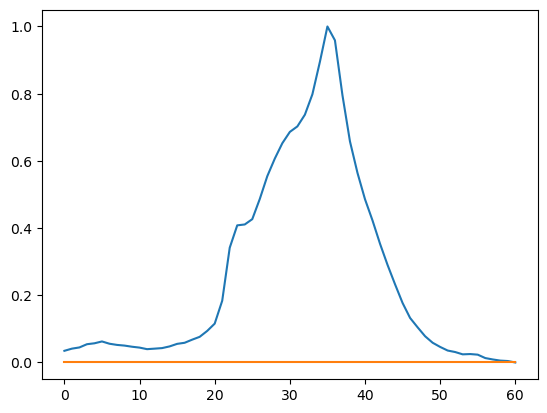

In [6]:
import matplotlib.pyplot as plt
plt.plot(lipid)
plt.plot(0.030*np.zeros_like(lipid))

In [7]:
dataset_arr = dataset_df.iloc[0:,1:].to_numpy()
dataset_size = dataset_df.shape[1]
# denoising_arr = np.empty(int(((dataset_size-1) * (dataset_size)) / 2) + 1, dtype="float32")
for j in tqdm(range(1, dataset_size - 2)):
    for i in range(j + 1, dataset_size - 1):
        combined_col = dataset_df.columns[j] + " + " + dataset_df.columns[i]
        temp_spectra = dataset_arr[:, j] + dataset_arr[:, i]
        new_dataset[combined_col] = processing.normalize(temp_spectra-temp_spectra.min())

new_dataset['Background'] = np.zeros_like(spectra)
denoising_df = pd.DataFrame(new_dataset)

filename = 'denoising_data_CH_61.csv'

# Save DataFrame to CSV
denoising_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

100%|██████████| 23/23 [00:00<00:00, 8321.31it/s]

Dictionary saved to denoising_data_CH_61.csv


In [8]:
denoising_df

,,Phosphatidylethanolamine,Phospholipid,Cholesterol,Cardiolipin,Sphingosine,Cholesterol ester,Dsg-Phosphatidylinositol,L-alpha-Phosphatidylinositol,L-alpha-Phosphatidylglycerol,...,"Phosphatidylcholine 18-1 + Ceramide 18-1,22-0","Phosphatidylcholine 18-1 + Deoxyceramide 18-1,24-1","Phosphatidylcholine 18-1 + Deoxyceramide 18-1,16-0","Phosphatidylethanolamine 18-1 + Ceramide 18-1,22-0","Phosphatidylethanolamine 18-1 + Deoxyceramide 18-1,24-1","Phosphatidylethanolamine 18-1 + Deoxyceramide 18-1,16-0","Ceramide 18-1,22-0 + Deoxyceramide 18-1,24-1","Ceramide 18-1,22-0 + Deoxyceramide 18-1,16-0","Deoxyceramide 18-1,24-1 + Deoxyceramide 18-1,16-0",Background
0,2700.000000,0.015953,0.034726,0.034251,0.033501,0.040557,0.042721,0.038351,0.037082,0.040457,...,0.043969,0.045428,0.039488,0.034723,0.040210,0.030066,0.026005,0.018965,0.021356,0.0
1,2706.666667,0.027160,0.041152,0.035156,0.040575,0.047288,0.058051,0.046702,0.047030,0.052683,...,0.054065,0.054881,0.049204,0.045035,0.051074,0.040023,0.036724,0.028763,0.031691,0.0
2,2713.333333,0.035808,0.044762,0.050728,0.051831,0.059040,0.084389,0.059588,0.063185,0.071861,...,0.060961,0.066148,0.065552,0.054932,0.066665,0.058883,0.046476,0.042123,0.051039,0.0
3,2720.000000,0.045121,0.054345,0.050740,0.059461,0.071656,0.071996,0.063446,0.074839,0.075826,...,0.071694,0.073799,0.077538,0.071141,0.081272,0.076299,0.060180,0.058659,0.066023,0.0
4,2726.666667,0.051768,0.057098,0.037033,0.063232,0.076641,0.070325,0.073282,0.078013,0.082456,...,0.074808,0.081267,0.081530,0.070413,0.085287,0.076393,0.065457,0.059926,0.072196,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3073.333333,0.006523,0.013175,0.003776,0.019199,0.002888,0.009161,0.005896,0.012077,0.006989,...,0.006417,0.006575,0.005340,0.004238,0.004289,0.002810,0.003101,0.003964,0.001942,0.0
57,3080.000000,0.011062,0.008996,0.001363,0.012183,0.001632,0.005116,0.006172,0.007131,0.004165,...,0.003319,0.004513,0.003284,0.002196,0.003047,0.001756,0.001346,0.002433,0.001246,0.0
58,3086.666667,0.010801,0.005606,0.000231,0.006513,0.001165,0.003373,0.003563,0.003959,0.005164,...,0.001089,0.002201,0.001261,0.001168,0.001746,0.000928,0.000441,0.001978,0.000555,0.0
59,3093.333333,0.004683,0.004317,0.000000,0.003265,0.001327,0.000676,0.001309,0.002505,0.003304,...,0.000000,0.001173,0.000427,0.000000,0.000505,0.000000,0.000000,0.001801,0.000374,0.0


In [9]:
filename = 'denoising_data_CH_61.csv'

# Save DataFrame to CSV
# denoising_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

Dictionary saved to denoising_data_CH_61.csv


In [10]:
molecule_arr = denoising_df.iloc[0:,1:].to_numpy()
molecule_arr.shape

(61, 302)

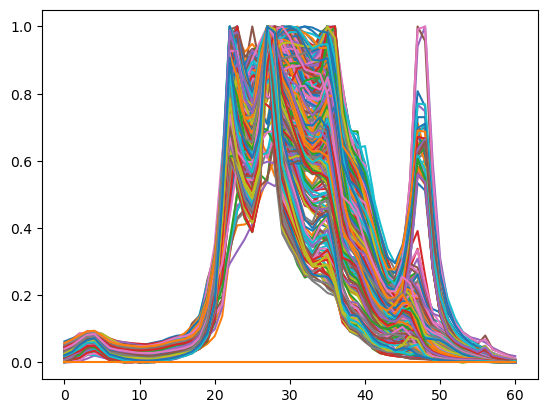

In [11]:
plt.plot(molecule_arr)

In [12]:
molecule_arr.shape

(61, 302)

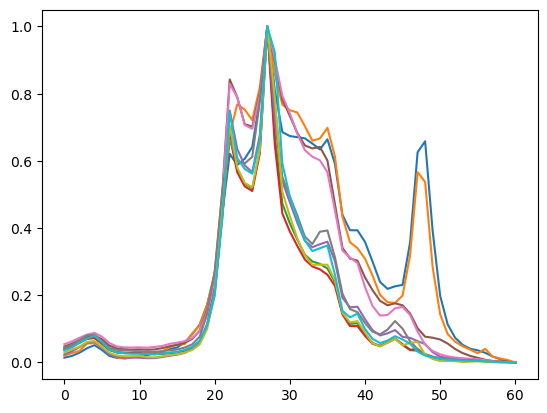

In [13]:
plt.plot(molecule_arr[:, 100:110])

In [61]:
from scipy.interpolate import interp1d
from scipy.stats import skewnorm


def augment_data(spectrum, wavenumbers, background, n_augment=5, noise_level=0.2, bg_level=0.75, max_shift=20):
    """
    Augment a single spectrum by adding noise and random shifts.
    Ensures all values are positive and within reasonable range for Raman spectra.
    """
    augmented_spectra = []
    original_max = 1 #np.max(spectrum)  # Get original spectrum's max value

    # Introduce randomness to noise and baseline
    bg_mult = np.sort(np.maximum(np.random.normal(loc=bg_level, scale=2 * noise_level, size=n_augment), 2 * noise_level))
    noise_mult = np.sort(np.maximum(np.abs(skewnorm.rvs(a=-4, loc=noise_level, scale=0.1 * noise_level, size=n_augment)), 0.5 * noise_level))


    for i in range(n_augment):
        # Add noise
        noise = np.random.normal(0, noise_mult[i] * original_max, len(spectrum))
        aug_spectrum = spectrum + noise

        # Shift wavenumbers
        shift = np.random.uniform(-max_shift / 2, max_shift / 2)  # Reduced shift range
        shifted_wavenumbers = wavenumbers + shift
        interp_func = interp1d(
            shifted_wavenumbers, aug_spectrum, kind="cubic", bounds_error=False, fill_value=0
        )
        aug_spectrum = interp_func(wavenumbers)

        # Add baseline curve
        baseline = bg_mult[i] * background
        aug_spectrum = aug_spectrum + baseline

        augmented_spectra.append(aug_spectrum)

    return np.array(augmented_spectra)

In [62]:


background = pd.read_csv('water_HSI_76.csv')
background = background.to_numpy()[:,0]
interp = interp1d(np.linspace(0,1, len(background)), background)
background = interp(np.linspace(0,1, molecule_arr.shape[0]))
background = processing.normalize(np.flip(background))

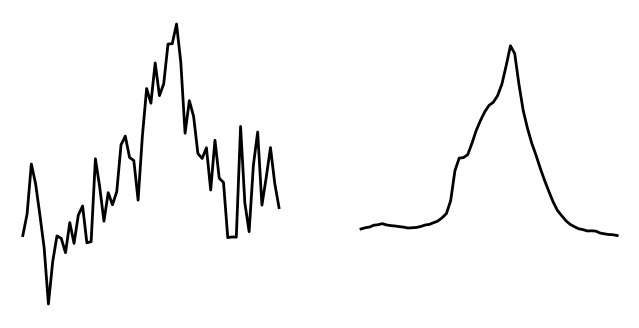

In [86]:

n_spectra = 1
add = (n_spectra-1) * 1.25
random_indices = np.random.choice(molecule_arr.shape[0], n_spectra, replace=False)
plt.style.use('default')
fig, ax = plt.subplots(1,2, figsize = (8,4), sharex=True, sharey=True)

names = denoising_df.drop('',axis=1).columns[random_indices]

for idx, molecule in enumerate(names):
    spectra_of_interest = denoising_df[molecule].to_numpy()
    spectra_augmented = augment_data(spectra_of_interest, new_wavenumbers, background, n_augment=1)
    ax[1].plot(new_wavenumbers, spectra_of_interest+add, linewidth=2, color='k')
    ax[0].plot(new_wavenumbers, spectra_augmented[0,:]+add,  linewidth=2, color='k')
    plt.gca().set_frame_on(False)
    ax[0].set_yticks([])
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    # ax[1].set_ylim(0,1)
    ax[0].set_xticks([])
    ax[1].set_xticks([])
    add -= 1.25
# fig.text(0.5, -0.05, 'Wavenumbers (cm$^{-1}$)', ha='center')
# fig.text(0.5, 0.9, 'Spontaneous Raman Augmentation', ha='center', fontsize=16, fontweight='bold')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
#           ncol=1, fancybox=True, shadow=True, fontsize='large')
# plt.tight_layout()
plt.savefig('augmented_data_figure.png')

In [76]:
np.sort(np.maximum(np.abs(skewnorm.rvs(a=-4, loc=0.2, scale=0.1 * 0.2, size=1)), 0.5 * 0.2))

array([0.18328917])

In [122]:
names

Index(['Phosphatidylethanolamine + L-alpha-Phosphatidylglycerol',
       'Palmitic Acid', 'Phosphatidylethanolamine + Palmitic Acid',
       'Cardiolipin', 'Phosphatidylcholine'],
      dtype='object')

In [126]:
denoising_df

,,Phosphatidylethanolamine,Phospholipid,Cholesterol,Cardiolipin,Sphingosine,Cholesterol ester,Dsg-Phosphatidylinositol,L-alpha-Phosphatidylinositol,L-alpha-Phosphatidylglycerol,...,"Phosphatidylcholine 18-1 + Ceramide 18-1,22-0","Phosphatidylcholine 18-1 + Deoxyceramide 18-1,24-1","Phosphatidylcholine 18-1 + Deoxyceramide 18-1,16-0","Phosphatidylethanolamine 18-1 + Ceramide 18-1,22-0","Phosphatidylethanolamine 18-1 + Deoxyceramide 18-1,24-1","Phosphatidylethanolamine 18-1 + Deoxyceramide 18-1,16-0","Ceramide 18-1,22-0 + Deoxyceramide 18-1,24-1","Ceramide 18-1,22-0 + Deoxyceramide 18-1,16-0","Deoxyceramide 18-1,24-1 + Deoxyceramide 18-1,16-0",Background
0,2700.000000,0.015953,0.034726,0.034251,0.033501,0.040557,0.042721,0.038351,0.037082,0.040457,...,0.043969,0.045428,0.039488,0.034723,0.040210,0.030066,0.026005,0.018965,0.021356,0.0
1,2706.666667,0.027160,0.041152,0.035156,0.040575,0.047288,0.058051,0.046702,0.047030,0.052683,...,0.054065,0.054881,0.049204,0.045035,0.051074,0.040023,0.036724,0.028763,0.031691,0.0
2,2713.333333,0.035808,0.044762,0.050728,0.051831,0.059040,0.084389,0.059588,0.063185,0.071861,...,0.060961,0.066148,0.065552,0.054932,0.066665,0.058883,0.046476,0.042123,0.051039,0.0
3,2720.000000,0.045121,0.054345,0.050740,0.059461,0.071656,0.071996,0.063446,0.074839,0.075826,...,0.071694,0.073799,0.077538,0.071141,0.081272,0.076299,0.060180,0.058659,0.066023,0.0
4,2726.666667,0.051768,0.057098,0.037033,0.063232,0.076641,0.070325,0.073282,0.078013,0.082456,...,0.074808,0.081267,0.081530,0.070413,0.085287,0.076393,0.065457,0.059926,0.072196,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3073.333333,0.006523,0.013175,0.003776,0.019199,0.002888,0.009161,0.005896,0.012077,0.006989,...,0.006417,0.006575,0.005340,0.004238,0.004289,0.002810,0.003101,0.003964,0.001942,0.0
57,3080.000000,0.011062,0.008996,0.001363,0.012183,0.001632,0.005116,0.006172,0.007131,0.004165,...,0.003319,0.004513,0.003284,0.002196,0.003047,0.001756,0.001346,0.002433,0.001246,0.0
58,3086.666667,0.010801,0.005606,0.000231,0.006513,0.001165,0.003373,0.003563,0.003959,0.005164,...,0.001089,0.002201,0.001261,0.001168,0.001746,0.000928,0.000441,0.001978,0.000555,0.0
59,3093.333333,0.004683,0.004317,0.000000,0.003265,0.001327,0.000676,0.001309,0.002505,0.003304,...,0.000000,0.001173,0.000427,0.000000,0.000505,0.000000,0.000000,0.001801,0.000374,0.0


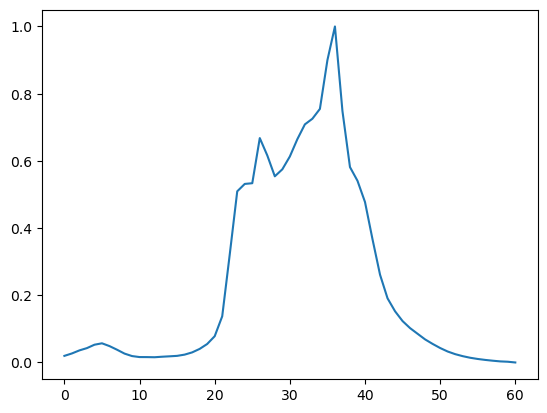

In [127]:
plt.plot(denoising_df['Triglyceride'])
